In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("../Datasets/startup_funding.csv")
df=dataset.copy()
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2367  2367  29/01/2015        Printvenue                NaN   
2368  2368  29/01/2015          Graphene                NaN   
2369  2369  30/01/2015    Mad Street Den                NaN   
2370  2370  30/01/2015         Simplotel                NaN   
2371  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [5]:
df.dropna(subset=["InvestmentType","InvestorsName","StartupName"],inplace=True)
df.reset_index(drop = True, inplace = True)
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2358  2367  29/01/2015        Printvenue                NaN   
2359  2368  29/01/2015          Graphene                NaN   
2360  2369  30/01/2015    Mad Street Den                NaN   
2361  2370  30/01/2015         Simplotel                NaN   
2362  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [6]:
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("OlaCabs","Ola",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']
print(df)

       SNo        Date       StartupName   IndustryVertical  \
0        0  01/08/2017          TouchKin         Technology   
1        1  02/08/2017           Ethinos         Technology   
2        2  02/08/2017      Leverage Edu  Consumer Internet   
3        3  02/08/2017              Zepo  Consumer Internet   
4        4  02/08/2017      Click2Clinic  Consumer Internet   
...    ...         ...               ...                ...   
2358  2367  29/01/2015        Printvenue                NaN   
2359  2368  29/01/2015          Graphene                NaN   
2360  2369  30/01/2015    Mad Street Den                NaN   
2361  2370  30/01/2015         Simplotel                NaN   
2362  2371  31/01/2015  couponmachine.in                NaN   

                                        SubVertical CityLocation  \
0                          Predictive Care Platform    Bangalore   
1                          Digital Marketing Agency       Mumbai   
2     Online platform for Higher Educat

In [8]:
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)

df=df[df["InvestmentType"]=="Private Equity"]

print(df.head())

   SNo        Date       StartupName IndustryVertical  \
0    0  01/08/2017          TouchKin       Technology   
1    1  02/08/2017           Ethinos       Technology   
6    6  03/07/2017  Ecolibriumenergy       Technology   
7    7  04/07/2017             Droom        eCommerce   
8    8  05/07/2017         Jumbotail        eCommerce   

                               SubVertical CityLocation  \
0                 Predictive Care Platform    Bangalore   
1                 Digital Marketing Agency       Mumbai   
6     Energy management solutions provider    Ahmedabad   
7       Online marketplace for automobiles      Gurgaon   
8  online marketplace for food and grocery    Bangalore   

                                     InvestorsName  InvestmentType  \
0                                      Kae Capital  Private Equity   
1                       Triton Investment Advisors  Private Equity   
6                             Infuse Ventures, JLL  Private Equity   
7  Asset Management (A

In [16]:
investor_name=[]
startup_name=[]

for index,row in df.iterrows():
    i=row["InvestorsName"]
    temp=i.split(',')
    for j in temp:
        if(j!=""):
            investor_name.append(j.strip())
            startup_name.append(row["StartupName"])
        
newDf=pd.DataFrame({"InvestorsName":investor_name,"StartupName":startup_name})
newDf=newDf.groupby("InvestorsName")["StartupName"].nunique()
newDf=newDf.sort_values(ascending=False).head(5)
print(newDf)

InvestorsName
Sequoia Capital    45
Accel Partners     43
Kalaari Capital    35
Blume Ventures     27
SAIF Partners      24
Name: StartupName, dtype: int64


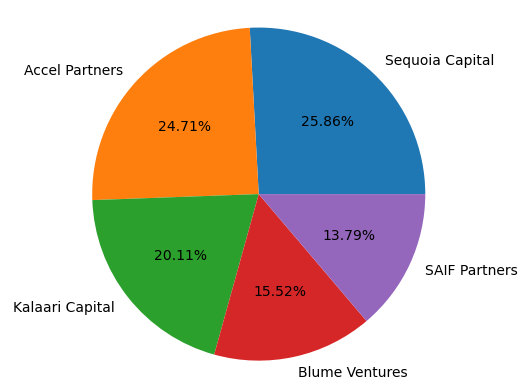

In [15]:
plt.pie(newDf,labels=newDf.index,autopct="%.2f%%")
plt.axis("equal")
plt.show()